In [1]:
import os
import re 
from glob import iglob
import pandas as pd
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sb
from sklearn import linear_model
#from tensorflow  
# %matplotlib inline*

from urllib.request import urlopen
from bs4 import BeautifulSoup

In [2]:
base_path = '/home/deepanshu/Documents/Punjab/**/*.xml'
# base_path = os.getcwd() + '/Punjab' + '/**' +'/**' + '/**' + '*.xml'
global_soil_database_df = pd.DataFrame()
soil_data_labels = ['SampleNo', 'SampleCollectionDate', 'LandArea', 'Irrigation', 'Longitude',
                    'Latitude', 'pH', 'EC', 'Organic Carbon (OC)', 'Available Nitrogen (N)', 
                    'Available Phosphorus (P)', 'Available Potassium (K)', 'Available Sulphur (S)',
                    'Available Zinc (Zn)', 'Available Boron (B)', 'Available Iron (Fe)', 
                    'Available Manganese (Mn)', 'Available Copper (Cu)']
soil_database_df = pd.DataFrame(columns=soil_data_labels)

In [3]:
for file_path in iglob(base_path, recursive=True):
    #print(file_path)
    #print(file_path)
    tree = ET.parse(file_path)
    
    #Print all the children of root element
    root = tree.getroot()
    
    #Display whole XML
    #print(ET.tostring(root, encoding='utf8').decode('utf8'))
    display_iter = root.iter('{SoilHealthCard}Details1')
    
    shc_info = next(display_iter)
    #regex to extract Lat/Long from string
    GeoPosition = shc_info.get('Textbox6')
    #print(GeoPosition)
    pattern = '\d+\.\d+'
    location = re.findall(pattern, GeoPosition)
    #Sample Data
    sample_data = [shc_info.get('Sample_No'), shc_info.get('Sample_Collection_Date')
            ,shc_info.get('Land_Area'),shc_info.get('Irrigation_Rainfed1'),location[0], location[1]]
    #DataLabels
    #if(action == 0):
    #Adding Data and Datalabels from Soil Test Report
    display_iter = display_iter.__iter__()
    for temp_test_data in display_iter:
        sample_data.append(temp_test_data.get("TestValue1"))

    #prepare dataframe for 1 soilHealthCard
    
    soil_database_df = soil_database_df.append(pd.DataFrame([sample_data], columns=soil_data_labels),ignore_index=True)
    #TO-DO
    #convert test values to numeric and fill missing values with NaN
display(soil_database_df)

,SampleNo,SampleCollectionDate,LandArea,Irrigation,Longitude,Latitude,pH,EC,Organic Carbon (OC),Available Nitrogen (N),Available Phosphorus (P),Available Potassium (K),Available Sulphur (S),Available Zinc (Zn),Available Boron (B),Available Iron (Fe),Available Manganese (Mn),Available Copper (Cu)
0,PB/2017-18/95481068/1,10-11-2017,3.00 Acre,Irrigated(Tube well),31.908097,74.837975,8.32,0.26,0.49,--,15.51,204.47,8.27,0.46,--,10.48,1.65,3.36
1,PB/2017-18/95481532/2,10-11-2017,4.00 Acre,Irrigated(Tube well),31.904383,74.834909,8.06,0.28,0.42,--,17.78,175.68,15.27,0.55,--,11.02,1.76,2.94
2,PB/2017-18/95485926/3,10-11-2017,4.00 Acre,Irrigated(Tube well),31.877772,74.843829,8.55,0.31,0.49,--,22.83,891.07,20.62,0.53,--,8.61,2.76,2.66
3,PB/2017-18/95481927/2,10-11-2017,3.00 Acre,Irrigated(Tube well),31.900756,74.834843,7.26,0.46,0.45,--,20.16,257.38,12.14,0.42,--,11.39,1.94,2.66
4,PB/2017-18/95486855/1,10-11-2017,4.00 Acre,Irrigated(Tube well),31.902261,74.838652,8.33,0.28,0.47,--,10.80,108.93,14.18,0.67,--,10.81,0.95,1.82
5,PB/2017-18/95483956/2,10-11-2017,8.00 Acre,Irrigated(Tube well),31.892888,74.849210,8.11,0.32,0.36,--,29.79,278.21,22.61,0.44,--,12.58,2.59,3.25
6,PB/2017-18/95482544/1,10-11-2017,9.50 Acre,Irrigated(Tube well),31.898534,74.826643,8.16,0.55,0.41,--,19.68,243.04,15.51,0.36,--,9.13,2.37,2.16
7,PB/2017-18/95483664/1,10-11-2017,8.00 Acre,Irrigated(Tube well),31.892732,74.847006,7.26,0.16,0.43,--,19.31,322.56,10.84,0.40,--,9.81,1.91,2.31
8,PB/2017-18/95482722/1,10-11-2017,4.00 Acre,Irrigated(Tube well),31.896844,74.837254,7.65,0.25,0.47,--,23.00,254.46,12.44,0.50,--,10.89,2.31,3.18
9,PB/2017-18/95485926/1,10-11-2017,4.00 Acre,Irrigated(Tube well),31.877772,74.843829,8.55,0.31,0.49,--,22.83,891.07,20.62,0.53,--,8.61,2.76,2.66


In [4]:
correlation_columns = ['pH', 'EC', 'OC' ,
                    'P', 'K', 'S',
                    'Zn' ,'Fe', 
                    'Mn', 'Cu']
correlation_data_frame = pd.DataFrame(soil_database_df.iloc[ :, [6,7,8,10,11,12,13,15,16 ,17]  ]  )
correlation_data_frame.columns = correlation_columns
correlation_data_frame = correlation_data_frame.replace('--',np.NaN)
correlation_data_frame = correlation_data_frame.astype(float,errors='raise')
soil_cr = correlation_data_frame.corr(method='pearson')
display(soil_cr)
correlation_data_frame.to_pickle('soil_health_data')

,pH,EC,OC,P,K,S,Zn,Fe,Mn,Cu
pH,1.000000,0.167771,-0.129450,-0.053704,-0.118619,0.237376,0.123438,-0.073908,-0.174847,-0.011495
EC,0.167771,1.000000,-0.111598,-0.165547,-0.106036,0.367209,0.262439,-0.275425,-0.261217,-0.026698
OC,-0.129450,-0.111598,1.000000,0.146984,0.156982,-0.249484,-0.156634,0.059766,0.148448,0.021109
P,-0.053704,-0.165547,0.146984,1.000000,0.426152,-0.064161,-0.041134,0.167889,0.270094,-0.058506
K,-0.118619,-0.106036,0.156982,0.426152,1.000000,-0.079553,-0.159885,-0.110785,0.056033,0.104372
S,0.237376,0.367209,-0.249484,-0.064161,-0.079553,1.000000,0.400212,-0.179539,-0.230513,-0.063530
Zn,0.123438,0.262439,-0.156634,-0.041134,-0.159885,0.400212,1.000000,0.159207,-0.093326,0.254019
Fe,-0.073908,-0.275425,0.059766,0.167889,-0.110785,-0.179539,0.159207,1.000000,0.552222,0.447950
Mn,-0.174847,-0.261217,0.148448,0.270094,0.056033,-0.230513,-0.093326,0.552222,1.000000,0.331578
Cu,-0.011495,-0.026698,0.021109,-0.058506,0.104372,-0.063530,0.254019,0.447950,0.331578,1.000000


,pH,EC,OC,P,K,S,Zn,Fe,Mn,Cu
count,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1978.000000,1978.000000
mean,7.948965,0.314343,0.408773,17.092359,173.358303,32.575833,1.143732,11.728505,2.075551,1.838645
std,0.426880,0.187685,0.053797,10.527791,115.994384,22.983215,0.715778,5.249854,1.593483,0.739006
min,7.010000,0.100000,0.200000,2.370000,31.010000,6.240000,0.150000,1.570000,0.110000,0.210000
25%,7.610000,0.210000,0.360000,9.340000,101.375000,18.760000,0.680000,7.817500,0.900000,1.390000
50%,8.000000,0.255000,0.410000,14.655000,134.500000,25.800000,0.980000,10.840000,1.520000,1.720000
75%,8.260000,0.350000,0.450000,20.827500,209.130000,37.300000,1.360000,15.050000,2.930000,2.120000
max,9.810000,0.990000,0.570000,87.570000,894.430000,187.600000,5.690000,35.810000,7.820000,6.040000


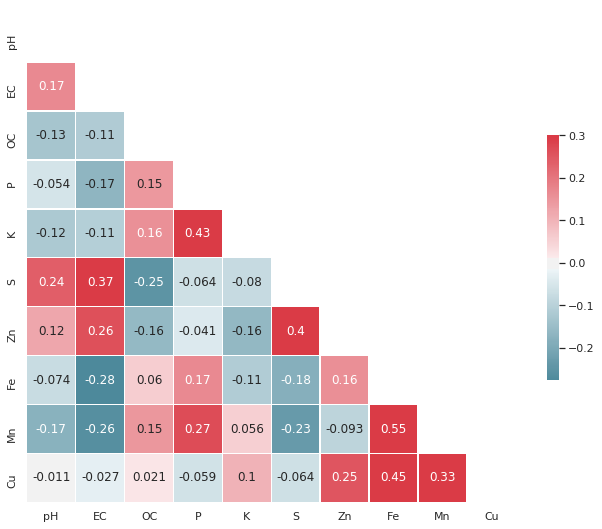

In [5]:
#Plots for correlation in soil nutrients
sb.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(soil_cr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(soil_cr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
display(correlation_data_frame.describe())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f527dc7d080>,
      dtype=object)

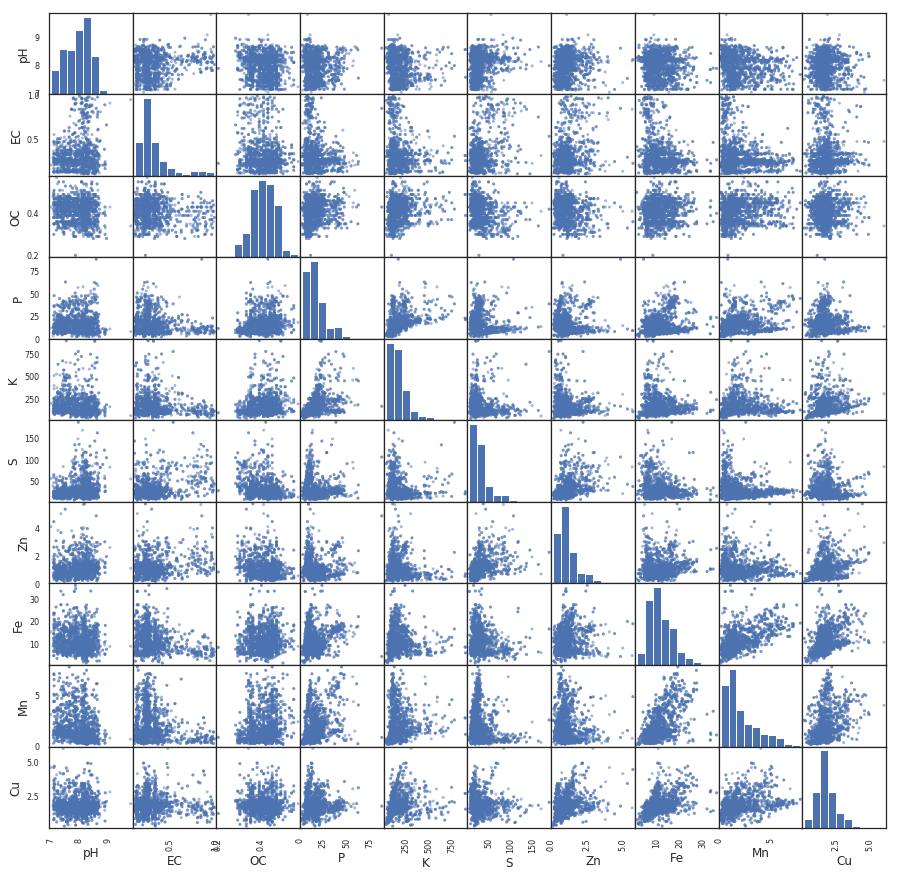

In [6]:
#Scatter matrix depicting correlation of soil nutrients
pd.plotting.scatter_matrix(
    correlation_data_frame,
    figsize  = [15, 15],
#     marker   = ".",
#     s        = 0.2,
#     diagonal = "kde"
)



In [7]:
#soil_database_df.info()

In [8]:
#soil_database_df.describe()

In [9]:
#import tensorflow as tf
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [10]:
correlation_data_frame = correlation_data_frame.reindex(np.random.permutation(correlation_data_frame.index))
# correlation_data_frame.describe()
X = correlation_data_frame[['pH', 'EC', 'OC', 
                     'S', 'Zn', 'Fe', 
                    'Mn','Cu']].copy()
Y_Phosphorus = correlation_data_frame[['P']].copy()
X.columns = ['pH', 'EC', 'OC', 
                     'S', 'Zn', 'Fe', 
                    'Mn','Cu']
Y_Phosphorus.columns = ['P']

In [17]:
b = X.loc[ :, 'pH' : 'Cu' ] == np.NaN
b.sum()


pH    0
EC    0
OC    0
S     0
Zn    0
Fe    0
Mn    0
Cu    0
dtype: int64

In [18]:
X = X.replace(np.NaN,0)
Y_Phosphorus = Y_Phosphorus.replace(np.NaN,0)

In [19]:
# display(X, Y_Phosphorus)
seed = 123
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y_Phosphorus, test_size=test_size, random_state=seed)

In [20]:
seed = 123
valid_size = 0.2
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=valid_size, random_state=seed)

In [22]:
print(X_train.shape , X_valid.shape , X_test.shape)

(1267, 8) (317, 8) (396, 8)


In [23]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
valid_matrix = xgb.DMatrix(data=X_valid)
test_matrix  = xgb.DMatrix(data=X_test,label=y_test)


In [24]:
def try_xgb_params(data_matrix,test_matrix  , num_boost_round=10 ,  early_stopping_rounds=50, **params):
    model = xgb.train(params,  data_matrix   )
    y_pred = model.predict( test_matrix)
    return y_pred , model

In [16]:
def get_accuracy( model , y_pred , y , X   ):
    rmse = np.sqrt(metrics.mean_squared_error(y , y_pred))
    return rmse 

In [30]:
params1 = {"objective":"reg:linear",'colsample_bytree': 0.2,'learning_rate': 0.6,
                'max_depth': 4, 'alpha': 20 }

In [31]:
y_pred , model_try = try_xgb_params(data_dmatrix ,valid_matrix ,   params1)

[10:02:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=6
[10:02:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=6
[10:02:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=6
[10:02:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[10:02:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=6
[10:02:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[10:02:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=6
[10:02:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=6
[10:02:08] /work

In [32]:
rmse  =   get_accuracy(model_try ,y_pred , y_valid , X_valid)

In [33]:
print(rmse )

6.24520772357577


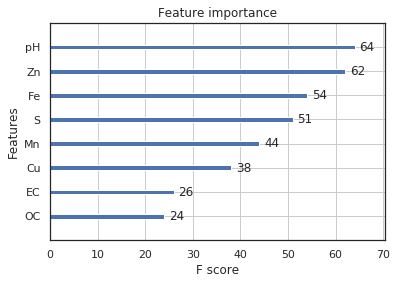

In [21]:
xgb.plot_importance(model)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()6.24520772357577

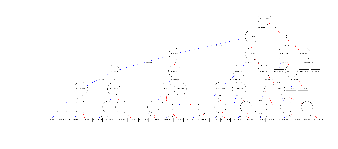

In [22]:
xgb.plot_tree(model)
plt.rcParams['figure.figsize'] = [200, 200]
# fig = plt.gcf() 
# fig.set_size_inches(150, 100)
plt.show()

In [23]:
#model.get_score(X_valid , y_valid)


list_of_params = []
params1 = {"objective":"reg:linear",'colsample_bytree': 0.2,'learning_rate': 0.30,
                'max_depth': 4, 'alpha': 10 }
params2 = {"objective":"reg:linear",'colsample_bytree': 0.4,'learning_rate': 0.5,
                'max_depth': 5, 'alpha': 10 }
params3 = {"objective":"reg:linear",'colsample_bytree': 0.8,'learning_rate': 0.7,
                'max_depth': 6, 'alpha': 10 }

list_of_params.append(params1)
list_of_params.append(params2)
list_of_params.append(params3)

for param in list_of_params:
    del model
    y_pred , model = try_xgb_params(data_dmatrix ,valid_matrix ,   param)
    rmse  =   get_accuracy(model ,y_pred , y_valid , X_valid)
    print(rmse)


[10:00:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=6
[10:00:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=6
[10:00:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=6
[10:00:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[10:00:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=6
[10:00:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[10:00:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=6
[10:00:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=6
[10:00:55] /work

In [24]:
# model = XGBRegressor(objective ='reg:linear', colsample_bytree = 1, learning_rate = 0.1,
#                 max_depth = 4, alpha = 10, n_estimators = 8)
# model.fit(X_train, y_train)
# print(model)
# #predict
# y_pred = model.predict(X_test)
# # print(y_test, y_pred)
# # evaluate predictions
# print(Y_Phosphorus.describe())
# rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
# print("RMSE: %f" % (rmse))
# print(model.score(X_train, y_train))
# # predictions = [round(value) for value in y_pred]
# # evaluate predictions
# # print("Accuracy: %.2f%%" % (accuracy * 100.0))
# xgb.plot_importance(model)
# plt.rcParams['figure.figsize'] = [5, 5]
# plt.show()

In [25]:
# # xgb.plot_tree(columns = ['pH', 'EC', 'Organic Carbon (OC)', 
# #                      'Available Sulphur (S)', 'Available Zinc (Zn)', 'Available Iron (Fe)', 
# #                     'Available Manganese (Mn)','Available Copper (Cu)'], model = model.booster, trees = None)
# data_dmatrix = xgb.DMatrix(data=X,label=Y_Phosphorus)
# params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
#                 'max_depth': 5, 'alpha': 10}
# # xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
# xgb.plot_tree(model)
# plt.rcParams['figure.figsize'] = [100, 100]
# plt.show()

<h4>  convert into validation set

In [26]:
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.33, random_state=seed)



# print(X_train.shape)
# print(X_valid.shape)